<a href="https://colab.research.google.com/github/ABHAY1937/ML-using-tensor-flow/blob/main/Image_recognition_using_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
print(tf.__version__)

2.12.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:



In [8]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [9]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

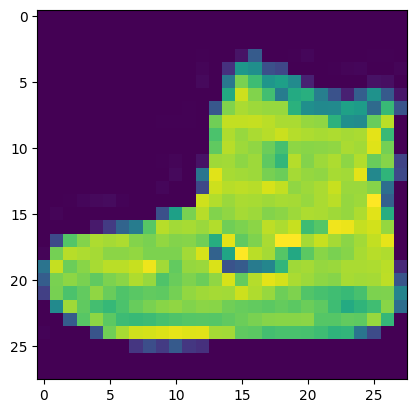

In [10]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5004 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3715 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8910


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each

In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.8719


[0.3474210798740387, 0.8719000220298767]

In [15]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[4.2855590e-06 2.5641677e-07 6.3384919e-06 5.8313651e-07 2.6165389e-06
 1.7715089e-02 1.9342042e-06 5.6356288e-02 4.4900047e-05 9.2586762e-01]


high probability value , so here the element should be in the 10th position

In [16]:
print(test_labels[0])

9


**CASE 2**

In [17]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4690
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3586
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3192
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2968
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[5.9319819e-07 5.8709706e-08 1.1551281e-08 6.9298234e-10 1.2835369e-07
 2.6051670e-03 1.3436052e-06 2.5960822e-03 8.1932183e-07 9.9479580e-01]
9


**CASE 3**

In [18]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5193
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3900
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3512
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3275
Epoch 5/5
313/313 [==============================] - 0s 950us/step
[7.3038082e-06 2.5165270e-09 1.9047899e-07 9.3867836e-10 2.1442502e-06
 6.8219662e-02 6.7539199e-06 2.5109702e-01 3.1877257e-04 6.8034822e-01]
9


**CASSE 4**

In [19]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5208
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3860
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3506
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3279
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[1.5440974e-05 3.1350019e-08 8.5710965e-08 5.8608663e-08 3.3637960e-08
 6.2744226e-03 1.9068065e-06 4.6131395e-02 7.6079421e-05 9.4750035e-01]
9


**CASE 5**

In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4692
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3560
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3195
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2975
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.6183225e-06 5.7910074e-07 3.1515846e-08 9.4815491e-08 1.2304301e-07
 4.3531792e-04 5.0429999e-06 5.4440334e-02 8.6920795e-07 9.4511592e-01]
9


**CASE 6**

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.12.0
Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5005
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3732
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3359
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3124
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2959
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2824
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2563
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2452
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2376
Epoch 11/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2300
Epoch 12/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0

**CASE 7**

In [21]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.12.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4738
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3564
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3188
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2952
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[6.9917128e-08 2.4592118e-06 2.2351321e-07 1.3868600e-08 8.7257877e-07
 3.0222947e-03 1.1886530e-06 2.8421728e-02 9.2372107e-07 9.6855021e-01]
9


**CASE 8**

In [23]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




2.12.0
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4724 - accuracy: 0.8312
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3593 - accuracy: 0.8703
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3243 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2989 - accuracy: 0.8895
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2811 - accuracy: 0.8952
